<a href="https://colab.research.google.com/github/vedangit/Driver-Drowsiness-Predicion/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/model.h5')

In [ ]:
img = cv2.imread("images.jpg")

(-0.5, 274.5, 182.5, -0.5)

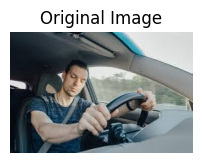

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

In [ ]:
def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (255, 255))
    resized_frame = resized_frame / 255.0  #rescale pixel values to [0, 1]
    return resized_frame

In [ ]:
def predict_frame(model, frame):
    #reshape frame to match model input shape
    frame = np.expand_dims(frame, axis=0)


    #prediction
    predictions = model.predict(frame)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0]) * 100
    return predicted_class, confidence

In [ ]:
processed_img = preprocess_frame(img)

In [ ]:
predicted_class, confidence = predict_frame(model, processed_img)

1/1 [==============================] - 0s 58ms/step


In [ ]:
class_names = ['Closed', 'Open', 'no_yawn', 'yawn']

In [ ]:
print("Predicted Class Label:", class_names[predicted_class])

Predicted Class Label: Closed


(-0.5, 254.5, 254.5, -0.5)

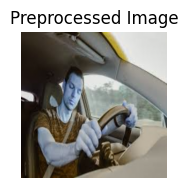

In [ ]:
plt.subplot(1, 3, 2)
plt.imshow(processed_img)
plt.title("Preprocessed Image")
plt.axis('off')

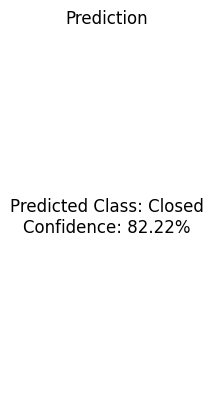

In [ ]:
plt.subplot(1, 3, 3)

plt.text(0.5, 0.5, f"Predicted Class: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%",
         horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.title("Prediction")
plt.axis('off')

plt.show()